In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn as sk
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn import preprocessing

***EXERCISE 1***  
- Before training a model to predict the occupancy status of each building we need to take a look at our data. Visualize (1) the distribution of the target variable (occupancy status) in the training dataset (2) a correlation plot to determine which features are strongly correlated to our target variable. Why did you choose these specific plots?  

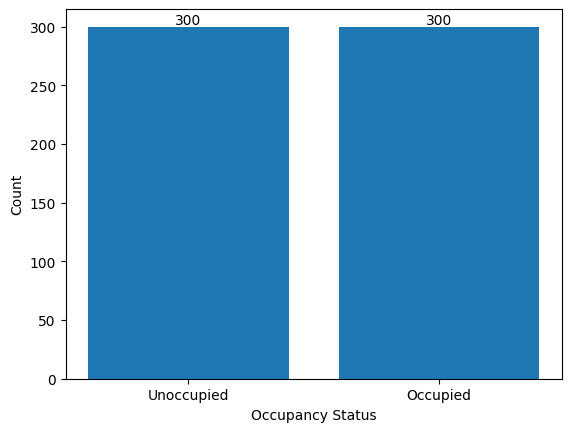

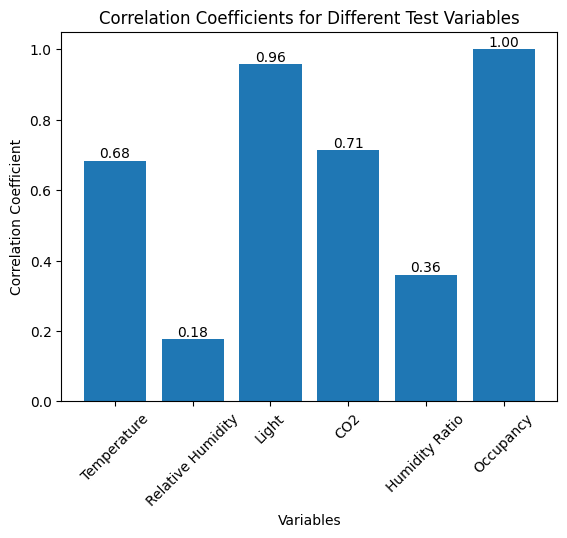

In [31]:
with open('OccupancyTest.csv') as f:
    OccupancyTestData = pd.read_csv(f, header=None, names=['Temperature', 'Relative Humidity', 'Light', 'CO2', 'Humidity Ratio', 'Occupancy'])
with open('OccupancyTrain.csv') as f:
    OccupancyTrainData = pd.read_csv(f, header=None, names=['Temperature', 'Relative Humidity', 'Light', 'CO2', 'Humidity Ratio', 'Occupancy'])

OccupancyTrainDataMatrix = np.transpose(np.array(OccupancyTrainData))
OccupancyTestDataMatrix = np.transpose(np.array(OccupancyTestData))

correlation_values = []

for testVariable in OccupancyTrainDataMatrix:
    correlation = np.corrcoef(OccupancyTrainDataMatrix[5], testVariable)
    correlation_values.append(correlation[0, 1])

occupancy_status, counts = np.unique(OccupancyTrainDataMatrix[5], return_counts=True)

plt.bar(occupancy_status, counts)
plt.xlabel('Occupancy Status')
plt.ylabel('Count')
plt.xticks([0, 1], ['Unoccupied', 'Occupied'])
for i, count in enumerate(counts):
    plt.text(occupancy_status[i], count, str(count), ha='center', va='bottom')
plt.show()

plt.bar(np.arange(6), correlation_values)
plt.xlabel('Variables')
plt.xticks(np.arange(6), ['Temperature', 'Relative Humidity', 'Light', 'CO2', 'Humidity Ratio', 'Occupancy'], rotation=45)
plt.ylabel('Correlation Coefficient')
for i, correlation in enumerate(correlation_values):
    plt.text(i, correlation, '{:.2f}'.format(correlation), ha='center', va='bottom')
plt.title('Correlation Coefficients for Different Test Variables')
plt.show()

***Interpretation of the plots***  
- In the first plot we can see a unique recount of both occupied and unoccupied statuses, I chose a bar plot to portray this because I thought it would be very visually clear for this specific data. It is very interesting that both statuses seem to have the same amount of recounts.  
- In the second plot we can see how there are several variables which show a high correlation coefficient, Occupancy obviously returns a perfect score of 1 because we are a calculating the correlation against itself. The next high correlations are Light, CO2 and Temperature, we will discard the Humidity Ratio and Relative Humidity since they seem to have a weak correlation with occupancy status. We could then speculate that Light, C02 and Temperature are strongly correlated with our target variable (Occupancy). I also chose the bar plot for this one because it seemed the correct one to portray this information in a comparative way.  

***EXERCISE 2***  
- Exercise 2 (1-NearestNeighbor / 10 points).
Apply a nearest neighbor classifier (1-NN) to the data to predict the occupancy status (0-1).
You are encouraged to implement it on your own.  

In [33]:
X_train = np.array(OccupancyTrainData)[:, :-1]
y_train = np.array(OccupancyTrainData)[:, -1]

X_test = np.array(OccupancyTestData)[:, :-1]
y_test = np.array(OccupancyTestData)[:, -1]

k = 1
knn_model = KNeighborsClassifier(n_neighbors=k)

knn_model.fit(X_train, y_train)

y_pred = knn_model.predict(X_test)


y_test_pred = knn_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Accuracy on test dataset: {test_accuracy:.4f}")

Accuracy on test dataset: 0.9775


***Discussion of the results:***  
- As we can see it seems that our 1-NN classifier has a good accuracy as reported by the function accuracy_score, meaning that from the 100% of the testing dataset 97.75% was used to accurately predict whether the status was occupied or unoccupied.  
- It must be said that accuracy alone might not be a perfect way to assess our model, and therefore tests that account for possible flaws in the model should be performed.  

***EXERCISE 3***  
- You will use a 5-fold cross-validation step to get accuracy scores of a k-NN classifier,
for k in {1, 3, 5, 7, 9, 11}. Use only training data.  
- Report kbest, the value of k for which the accuracy is the highest and justify: is it always
better to consider more neighbors?  

In [25]:
k_values = [1, 3, 5, 7, 9, 11]

best_k = None
best_accuracy = 0

for k in k_values:
    cv = KFold(n_splits=5, shuffle=True, random_state=42)
    accuracies = []

    for train_idx, test_idx in cv.split(X_train):
        
        X_train_fold, X_test_fold = X_train[train_idx], X_train[test_idx]
        y_train_fold, y_test_fold = y_train[train_idx], y_train[test_idx]
        
        knn_model_cv = KNeighborsClassifier(n_neighbors=k)
        knn_model_cv.fit(X_train_fold, y_train_fold)
        
        y_pred_fold = knn_model_cv.predict(X_test_fold)

        accuracy_fold = accuracy_score(y_test_fold, y_pred_fold)
        accuracies.append(accuracy_fold)

    average_accuracy = sum(accuracies) / len(accuracies)

    if average_accuracy > best_accuracy:
        best_k = k
        best_accuracy = average_accuracy

print(f"The best value of k is {best_k}")

The best value of k is 3


***Report***  
- K_best = 3.  
- To obtain this result we trained the model in each iteration of the for loop with different number of neighbors and tested each time to see which is the optimal k value for our model.  
- To answer the question as for whether it's always better to consider more neighbors, it's not necessarily the case. Lower values of k can lead to overfitting and higher values tend to smooth the predictions, but if k is too high it can lead to underfitting (IBM, 2024) that is why we approach testing with a cross validation method to assess which in a range of values performs better with our given data.  

***EXERCISE 4***  
- To estimate general performance, build a kbest-NN classifier using the complete training dataset OccupancyTrain.csv and evaluate it on the independent test set OccupancyTest.csv. Evaluate it also on train data itself and report its accuracy. Interpret the results.  

In [27]:
train_data = pd.read_csv('OccupancyTrain.csv')
test_data = pd.read_csv('OccupancyTest.csv')

X_train = train_data.iloc[:, :-1].values
y_train = train_data.iloc[:, -1].values

X_test = test_data.iloc[:, :-1].values
y_test = test_data.iloc[:, -1].values

best_k = 3

knn_model = KNeighborsClassifier(n_neighbors=best_k)
knn_model.fit(X_train, y_train)

y_train_pred = knn_model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Accuracy on training dataset: {train_accuracy:.4f}")

y_test_pred = knn_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Accuracy on test dataset: {test_accuracy:.4f}")

Accuracy on training dataset: 0.9933
Accuracy on test dataset: 0.9875


***Discussion***  
- From the results we can interpret that using a KNN model trained with the k_best value we found yields better accuracy (99.33% on training and 98.75% on test) than the 1-NN we trained in the second exercise (97.75%).  
- Overall we can see how the prediction improves comparatively.  

***Exercise 5***  
- Center and normalize the data and repeat the model selection and classification process from Exercise 3 and Exercise 4.

In [23]:
train_data = pd.read_csv('OccupancyTrain.csv')
test_data = pd.read_csv('OccupancyTest.csv')

X_train = train_data.iloc[:, :-1].values
y_train = train_data.iloc[:, -1].values

X_test = test_data.iloc[:, :-1].values
y_test = test_data.iloc[:, -1].values

#we use version 1 because of is the correct one I will discuss why later.
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

k_values = [1, 3, 5, 7, 9, 11]
best_k = None
best_accuracy = 0

for k in k_values:
    cv = KFold(n_splits=5, shuffle=True, random_state=42)
    accuracies = []

    for train_idx, test_idx in cv.split(X_train_scaled):
        X_train_fold, X_test_fold = X_train_scaled[train_idx], X_train_scaled[test_idx]
        y_train_fold, y_test_fold = y_train[train_idx], y_train[test_idx]

        knn_model_cv = KNeighborsClassifier(n_neighbors=k)
        knn_model_cv.fit(X_train_fold, y_train_fold)

        y_pred_fold = knn_model_cv.predict(X_test_fold)

        accuracy_fold = accuracy_score(y_test_fold, y_pred_fold)
        accuracies.append(accuracy_fold)

    average_accuracy = sum(accuracies) / len(accuracies)

    if average_accuracy > best_accuracy:
        best_k = k
        best_accuracy = average_accuracy

print(f"The best value of k is {best_k}")

knn_model = KNeighborsClassifier(n_neighbors=best_k)
knn_model.fit(X_train_scaled, y_train)

y_train_pred = knn_model.predict(X_train_scaled)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Accuracy on training dataset: {train_accuracy:.7f}")

y_test_pred = knn_model.predict(X_test_scaled)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Accuracy on test dataset: {test_accuracy:.7f}")

The best value of k is 9
Accuracy on training dataset: 0.9916528
Accuracy on test dataset: 0.9774436


***Discussion***  
- Versions of normalization:  
    - I chose the first one because you create the instance of the scaler with the training dataset and then apply that instance of the scaler to both datasets so they are transformed on the same scaling parameters.  
    - The second version is wrong because you are creating different instances of the scalers which defeats the purpose of normalizing the data because you are mixing scaling parameters.  
    - The third version is wrong also because when you are concatenating both datasets you are mixing the seen data with the unseen data creating potential biases, each dataset should be scaled independently of each other and using the same scaling parameters.  

- After normalization:  
    - K_best = 9  
    - Training dataset accuracy = 99.16%  
    - Testing dataset accuracy = 97.74%  

    - Comment: It seems that normalizing the data actually decreased the accuracy of my model. After a brief research on why this might be happening, I came across a paper (Chih-Min Ma et al., 2014) referencing how different types of normalization can yield different accuracies for the KNN algorithm. Nevertheless other factors might be playing a role in affecting my model in such a way, i.e.: Feature Engineering or an already similarity on the scaling of the datasets before the normalization therefore rendering useless the normalization.  



Note: I am loading the dataset in each cell just to be safe since jupyter notebooks tend to do weird things if not. Also I started loading it with numpy at first but I learned towards the end of assignment that the pandas' way was overall easier and cleaner.

ChatGPT 3.5 was used as a writing assistance tool and as a search tool to identify related literature for this assignment.

***References***  
- IBM. (2024). *What is the k-nearest neighbors (KNN) algorithm?* https://www.ibm.com/topics/knn  
- Chih-Min Ma, Wei-Shui Yang and Bor-Wen Cheng, 2014. How the Parameters of K-nearest Neighbor Algorithm Impact on the Best Classification Accuracy: In Case of Parkinson Dataset. Journal of Applied Sciences, 14: 171-176